In [2]:
%config IPCompleter.greedy=True #to allow intellisense

In [3]:
import pandas as pd

In [4]:
# Fantasy football raw json data from here: https://fantasy.premierleague.com/api/bootstrap-static/
# I had to use power BI to convert the structured json data to a flat csv file
# (Need to investigate how to do this using python)
ffData = pd.read_csv('data\\ff.csv')

In [5]:
ffData.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,positions.id,positions.plural_name,positions.plural_name_short,positions.singular_name,positions.singular_name_short,positions.squad_select,positions.squad_min_play,positions.squad_max_play,positions.ui_shirt_specific,positions.sub_positions_locked
0,NaN,NaN,69140,0,0,-2,2,0,2,1.0,...,2,Defenders,DEF,Defender,DEF,5,3,5,False,[List]
1,100.0,100.0,98745,0,0,-1,1,0,2,1.0,...,2,Defenders,DEF,Defender,DEF,5,3,5,False,[List]
2,100.0,100.0,233963,0,0,-1,1,0,2,1.0,...,2,Defenders,DEF,Defender,DEF,5,3,5,False,[List]
3,100.0,100.0,156074,0,0,0,0,0,2,1.0,...,2,Defenders,DEF,Defender,DEF,5,3,5,False,[List]
4,100.0,100.0,37605,0,0,-2,2,0,3,1.5,...,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[List]


In [6]:
#plot it
ffData.plot(x='now_cost', y='total_points',kind='scatter')

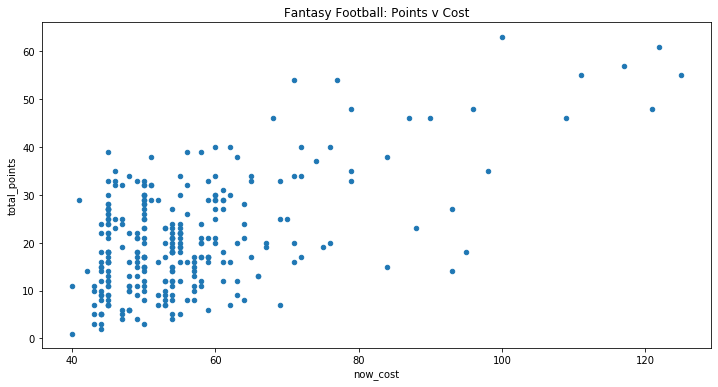

In [11]:
#Filter the data and re-plot
ffData = ffData[(ffData['minutes'] > 180) | (ffData['total_points'] > 10)]
ax = ffData.plot(x='now_cost', y='total_points',kind='scatter', figsize=(12,6))
ax.title.set_text('Fantasy Football: Points v Cost');

In [9]:
# Create data frames for each position
ffMid = ffData[ffData['positions.singular_name_short'] == 'MID']
ffGkp = ffData[ffData['positions.singular_name_short'] == 'GKP']
ffDef = ffData[ffData['positions.singular_name_short'] == 'DEF']
ffFwd = ffData[ffData['positions.singular_name_short'] == 'FWD']

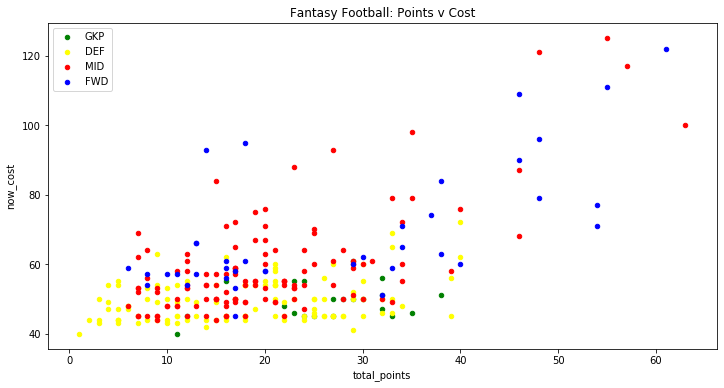

In [10]:
#Plot the data for each position.  Do this separately onto the same plot so that Legend/Colours are popualted easily
ax = ffGkp.plot.scatter(x='total_points', y='now_cost', color='green', label='GKP', figsize=(12,6));
ffDef.plot.scatter(x='total_points', y='now_cost', color='yellow', label='DEF', ax=ax);
ffMid.plot.scatter(x='total_points', y='now_cost', color='red', label='MID', ax=ax);
ffFwd.plot.scatter(x='total_points', y='now_cost', color='blue', label='FWD', ax=ax);
ax.title.set_text('Fantasy Football: Points v Cost');


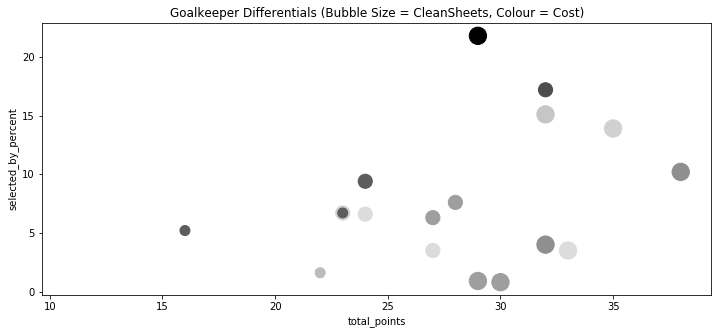

In [12]:
# Now lets just look at one position - Goalkeepers
# plot the points vs percentage owned to find keepers which might be differentials
# use bubble size and color
ax =ffGkp.plot.scatter(x='total_points', y='selected_by_percent', c=ffGkp['now_cost'], legend=False,  label='GKP', figsize=(12,5), s=ffGkp['clean_sheets']*100);
ax.title.set_text('Goalkeeper Differentials (Bubble Size = CleanSheets, Colour = Cost)');


<Figure size 432x288 with 0 Axes>

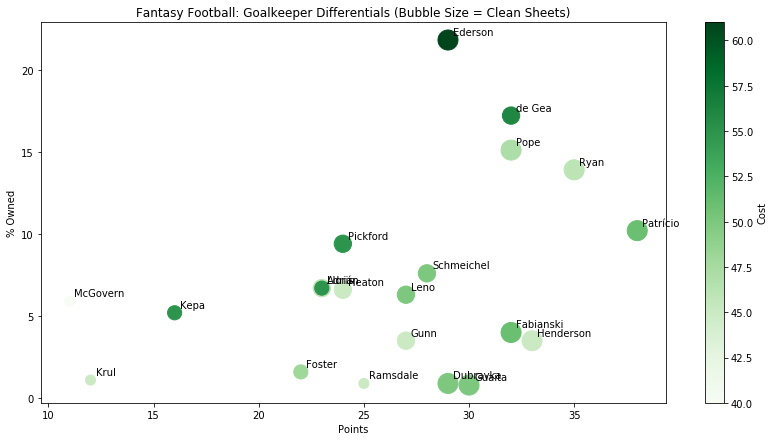

In [13]:
# The previous Chart was interesting, but it needs data labels to see which goalkeeper each point represents.
# We need to annotate it
import matplotlib.pyplot as plt
plt.clf()
fig = plt.figure(figsize=(14,7))
xs = ffGkp['total_points']
ys = ffGkp['selected_by_percent']
zs = ffGkp['web_name']

plt.scatter(xs,ys, s=ffGkp['clean_sheets']*100 + 100, c=ffGkp['now_cost'], cmap='Greens')

for x,y,z in zip(xs,ys,zs):
    label = z
    
    plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(5,5),
                ha='left')
plt.xlabel('Points')
plt.ylabel('% Owned')
plt.title('Fantasy Football: Goalkeeper Differentials (Bubble Size = Clean Sheets)')
cbar = plt.colorbar()
cbar.set_label('Cost')
plt.show()


In [ ]:
# Goalkeepers towards the bottom/right of the plot are the best differentials (I.e. least owned and highest point scorers)
# Henderson looks like a good value differential keeper.